<h2><strong>Import and Loading dataset</strong></h2>

In [1]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Load the dataset
train_df = pd.DataFrame(pd.read_csv('train.csv'))
test_df = pd.DataFrame(pd.read_csv('test.csv'))

<h2><strong>Feature Analysis</strong></h2>

In [3]:
# Info of train set
# Values of Age, Cabin, Embarked have empty values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<h3><strong>Heatmap of the dataset</strong></h3>
<p>Features are independent from each other. SibSp and Parch have highest heatmap value.</p>

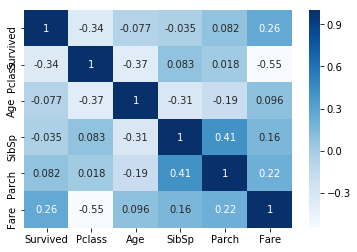

In [4]:
heatmap_df = train_df.drop(['PassengerId'], axis=1)
sns.heatmap(heatmap_df.corr(), annot=True, cmap='Blues')

<h3><strong>Age Analysis</strong></h3>

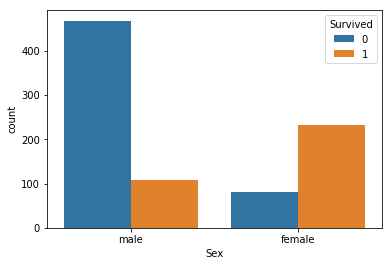

In [5]:
# Analysis of the features
# Females are most likely to survive

sns.countplot(x='Sex', hue='Survived', data=train_df)

In [6]:
# Analysis of the features
# Function to calculate the rate of survival for all values of a particular feature

def rate_of_survival(df, feature, xlabel=None, opposite=False, plot=True):
    
    # Filter the dataset and group by the feature
    filter_df = df[[feature, 'PassengerId', 'Survived']]
    total_df = filter_df.groupby([feature], as_index=False).count()
    survived_df = filter_df[filter_df['Survived'] == int(not opposite)].groupby([feature], as_index=False).count()

    # Create the SurvivalRate feature
    survived_df['SurvivalRate'] = survived_df['PassengerId'] / total_df['PassengerId']
    survived_df.drop(['PassengerId'], axis=1, inplace=True)
    
    if plot == True:
        plt.bar(survived_df[feature], survived_df['SurvivalRate'])
        plt.xticks(list(range(int(df[feature].min()), int(df[feature].max()+1))))
        plt.xlabel(feature if xlabel == None else xlabel)
        plt.ylabel('Rate of Death' if opposite else 'Rate of Survival')
    
    else:
        return survived_df

<h3><strong>Rate of Survival</strong></h3>
<p>Siblings, Parents, Passenger Class, and Siblings + Parents are analysed with rate of survival</p>

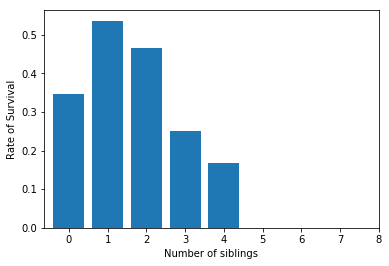

In [7]:
# Plot the Survival rate for each Siblings value
# People with low SibSp value have high chance of survival

rate_of_survival(train_df, 'SibSp', xlabel='Number of siblings')

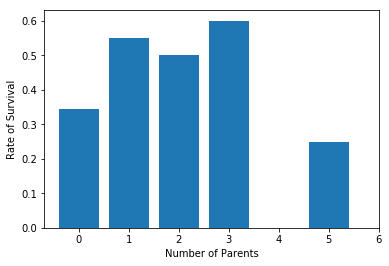

In [8]:
# Plot the Survival rate for Parch values
# People with low SibSp value have high chance of survival

rate_of_survival(train_df, 'Parch', xlabel='Number of Parents')

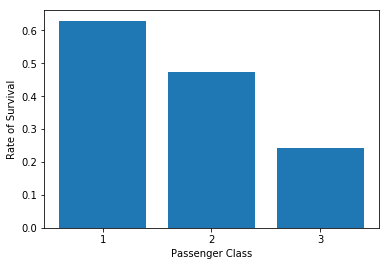

In [9]:
# Plot the Passenger Class vs Survival Rate
# People of higher class have high survival chance

rate_of_survival(train_df, 'Pclass', xlabel='Passenger Class')

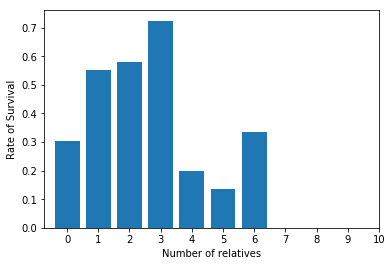

In [10]:
# Combine the SibSp and Parch features to make a Relative feature

relative_df = train_df.copy()
relative_df['Relatives'] = relative_df['SibSp'] + relative_df['Parch']
rate_of_survival(relative_df, 'Relatives', 'Number of relatives')

<h3><strong>Age analysis</strong></h3>

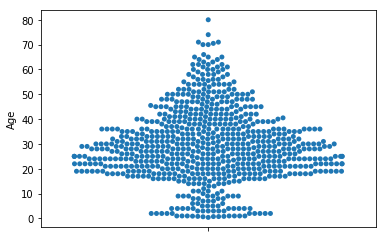

In [11]:
# Analysing Age feature
# Most of the people are in the range 20 to 30 years of age

sns.swarmplot(y='Age', data=train_df)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

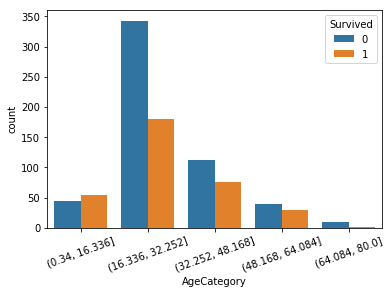

In [14]:
# Cut the Age feature into 5 bins
# Effectively covers the 16-32 age range where most of the people seem to fall in
# Fill the NaN values with a random integer in [16, 32) interval

age_categories_df = train_df.copy()
age_categories_df['Age'].fillna(np.random.randint(16, high=32), inplace=True)
age_categories_df['AgeCategory'] = pd.cut(np.array(age_categories_df['Age']), 5)
# age_categories_df[['AgeCategory', 'PassengerId']].groupby(['AgeCategory'], as_index=False).count()

# Plot of the age categories vs count of people
sns.countplot(x='AgeCategory', hue='Survived', data=age_categories_df)
plt.xticks(rotation=20)

<h3><strong>Analysis of Embarked</strong></h3>

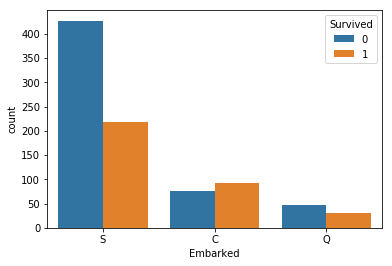

In [15]:
# Analysis of features
# Most of the people embarked from S so fill na values with S

embarked_df = train_df.copy()
embarked_df['Embarked'].fillna('S', inplace=True)
sns.countplot(x='Embarked', hue='Survived', data=embarked_df)

# Plotting the rate of survival for Embarked
embarked_df['Embarked'] = embarked_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

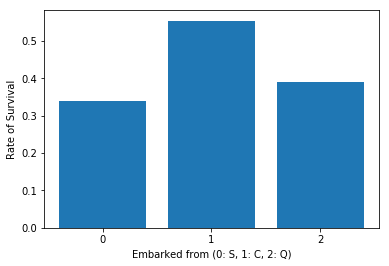

In [16]:
# Plot Survival Rate of Embarked
rate_of_survival(embarked_df, 'Embarked', xlabel='Embarked from (0: S, 1: C, 2: Q)')

<h3><strong>Fare Analysis</strong></h3>

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

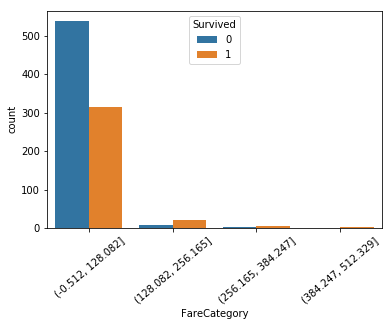

In [17]:
# Analysis of features
# Selecting categories for fares
# Dividing fares into 4 categories

fare_categories_df = train_df.copy()[['PassengerId', 'Survived', 'Fare']]
fare_categories_df['FareCategory'] = pd.cut(np.array(fare_categories_df['Fare']), 4)

# Plot of the fare categories vs count of people
sns.countplot(x='FareCategory', hue='Survived', data=fare_categories_df)
plt.xticks(rotation=40)

<h3><strong>Cabin Analysis</strong></h3>

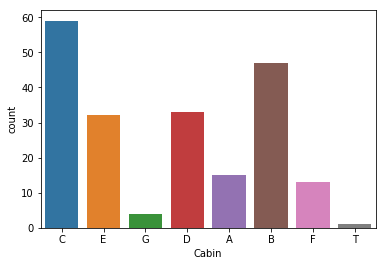

In [18]:
# Analysis of features
# Extracting the Cabin from the first letters of Cabin values

cabin_df = train_df.copy()
cabin_df['Cabin'] = cabin_df['Cabin'].str[:1]
sns.countplot(x='Cabin', data=cabin_df)

<h3><strong>Name Analysis</h3></strong>

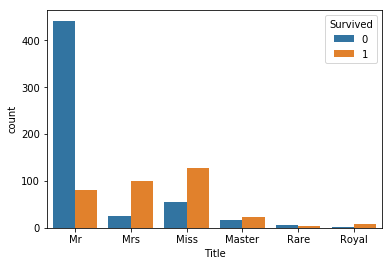

In [19]:
# Analysis of features
# Extracting the titles from names

name_df = train_df.copy()
name_df['Title'] = name_df['Name'].str.extract(', (\w+).', expand=False)

# Mapping titles with equivalents
name_equivalents = ['Rare', 'Royal', 'Rare', 'Rare', 'Rare', 'Royal', 'Royal', 'Master', 'Miss', 'Royal', 'Royal', 'Mr', 
                    'Mrs', 'Miss', 'Mr', 'Royal', 'Royal']
titles_set = sorted(set(name_df['Title']))
name_mapping = dict(zip(titles_set, name_equivalents))
name_df['Title'] = name_df['Title'].map(name_mapping)

sns.countplot(x='Title', hue='Survived', data=name_df)

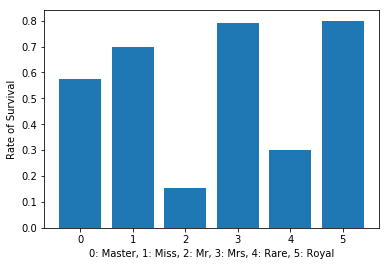

In [20]:
# Plotting Survival Rate for different titles

name_df['TitleMap'] = name_df['Title']
titles = sorted(set(name_df['TitleMap']))
titles_mapping = dict(zip(titles, [i for i in range(0, len(titles))]))
name_df['TitleMap'] = name_df['TitleMap'].map(titles_mapping)
rate_of_survival(name_df, 'TitleMap', '0: Master, 1: Miss, 2: Mr, 3: Mrs, 4: Rare, 5: Royal')

<h2><strong>Feature Engineering</strong></h3>

In [21]:
train_df.shape

(891, 12)

In [22]:
test_df.shape

(418, 11)

In [23]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [24]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [25]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [30]:
# Merge two dataframes
dataset = train_df.drop(['Survived'], axis=1).append(test_df, ignore_index=True)
dataset.shape

(1309, 11)

In [31]:
# Info of the merged dataframes
# Age, Fare, and Embarked have missing values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [40]:
# Extract titles and map them to numeric values
dataset['Title'] = dataset['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())

titles_mapping = {'Mr': 0, 'Master': 0.4, 'Mrs': 0.8, 'Miss': 1.2, 'Royal': 1.6, 'Rare': 2.0}
name_mapping = {'Capt': 'Rare', 'Col': 'Royal', 'Don': 'Rare', 'Dona': 'Rare', 'Dr': 'Rare',
                'Jonkheer': 'Rare', 'Lady': 'Royal', 'Major': 'Royal', 'Master': 'Master',
                'Miss': 'Miss', 'Mlle': 'Royal', 'Mme': 'Royal', 'Mr': 'Mr', 'Mrs': 'Mrs',
                'Ms': 'Miss', 'Rev': 'Mr', 'Sir': 'Royal', 'the Countess': 'Royal'}

dataset['Title'] = dataset['Title'].map(name_mapping).map(titles_mapping)
dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.8
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.2
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.8
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Title          1309 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [46]:
# Make a new Relatives feature to add Siblings and Parents
# Add a IsAlone feature
dataset['Relatives'] = dataset['SibSp'] + dataset['Parch']
dataset['IsAlone'] = (dataset['Relatives'] == 0).astype(int)
dataset.drop(['SibSp', 'Parch'], axis=1, inplace=True)
dataset.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Relatives,IsAlone
0,1,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,0.0,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,0.8,1,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,1.2,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,0.8,1,0
4,5,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0.0,0,1


In [47]:
# Fill the NaN values of Embarked
# Map the embarked feature
embarked_mapping = {'S': 0, 'C': 1, 'Q': 1.4}
dataset['Embarked'] = dataset['Embarked'].fillna('S').map(embarked_mapping)
dataset.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Relatives,IsAlone
0,1,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,0.0,0.0,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,1.0,0.8,1,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,0.0,1.2,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,0.0,0.8,1,0
4,5,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,0.0,0.0,0,1


In [48]:
"""# Extract the Cabin from the first letter of Cabin values
dataset['Cabin'] = dataset['Cabin'].str[:1].fillna('O')
cabins = sorted(set(dataset['Cabin']))

# Map the Cabin to numerics
cabin_mapping = dict(zip(cabins, list(range(0, len(cabins)))))
dataset['Cabin'] = (dataset['Cabin'].map(cabin_mapping) * 0.4).round(1)
dataset.head()"""

"# Extract the Cabin from the first letter of Cabin values\ndataset['Cabin'] = dataset['Cabin'].str[:1].fillna('O')\ncabins = sorted(set(dataset['Cabin']))\n\n# Map the Cabin to numerics\ncabin_mapping = dict(zip(cabins, list(range(0, len(cabins)))))\ndataset['Cabin'] = (dataset['Cabin'].map(cabin_mapping) * 0.4).round(1)\ndataset.head()"

In [49]:
# Drop Ticket, Name and Cabin features
dataset.drop(['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
dataset.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Relatives,IsAlone
0,1,3,male,22.0,7.2500,0.0,0.0,1,0
1,2,1,female,38.0,71.2833,1.0,0.8,1,0
2,3,3,female,26.0,7.9250,0.0,1.2,0,1
3,4,1,female,35.0,53.1000,0.0,0.8,1,0
4,5,3,male,35.0,8.0500,0.0,0.0,0,1


In [50]:
# Format the Sex feature
sex_mapping = {'male': 0, 'female': 1}
dataset['Sex'] = dataset['Sex'].map(sex_mapping)
dataset.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Relatives,IsAlone
0,1,3,0,22.0,7.2500,0.0,0.0,1,0
1,2,1,1,38.0,71.2833,1.0,0.8,1,0
2,3,3,1,26.0,7.9250,0.0,1.2,0,1
3,4,1,1,35.0,53.1000,0.0,0.8,1,0
4,5,3,0,35.0,8.0500,0.0,0.0,0,1


In [51]:
# Fill the empty age values with [16, 32) interval
# Divide the Age into categories
dataset['Age'].fillna(np.random.randint(16, high=32), inplace=True)
dataset['AgeCategory'] = pd.cut(np.array(dataset['Age']), 5)

# Extract the left of Intervals to make a dictionary for mapping
dataset['AgeCategory'] = dataset['AgeCategory'].apply(lambda x: x.left)

# Creating a dictionary of Age Categories
age_categories_list = [i for i in dataset['AgeCategory']]
age_categories_list = sorted(list(set(age_categories_list)))
age_mapping = dict(zip(age_categories_list, [i * 0.4 for i in list(range(0, 5))]))

# Map the ages
dataset['Age'] = dataset['AgeCategory'].map(age_mapping)
dataset.drop(['AgeCategory'], axis=1, inplace=True)
dataset.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Relatives,IsAlone
0,1,3,0,0.4,7.2500,0.0,0.0,1,0
1,2,1,1,0.8,71.2833,1.0,0.8,1,0
2,3,3,1,0.4,7.9250,0.0,1.2,0,1
3,4,1,1,0.8,53.1000,0.0,0.8,1,0
4,5,3,0,0.8,8.0500,0.0,0.0,0,1


In [52]:
# Divide Fare into categories
dataset['FareCategory'] = pd.cut(np.array(dataset['Fare']), 4)
dataset['FareCategory'] = dataset['FareCategory'].apply(lambda x: x.left)

# Creating a dictionary of Fare Categories
fare_categories_list = [i for i in dataset['FareCategory']]
fare_categories_list = sorted(list(set(fare_categories_list)))
fare_mapping = dict(zip(fare_categories_list, [i * 0.4 for i in list(range(0, 4))]))

# Map the fare
dataset['Fare'] = dataset['FareCategory'].map(fare_mapping).fillna(0.0)
dataset.drop(['FareCategory'], axis=1, inplace=True)
dataset.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Relatives,IsAlone
0,1,3,0,0.4,0.0,0.0,0.0,1,0
1,2,1,1,0.8,0.0,1.0,0.8,1,0
2,3,3,1,0.4,0.0,0.0,1.2,0,1
3,4,1,1,0.8,0.0,0.0,0.8,1,0
4,5,3,0,0.8,0.0,0.0,0.0,0,1


In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null int64
Age            1309 non-null float64
Fare           1309 non-null float64
Embarked       1309 non-null float64
Title          1309 non-null float64
Relatives      1309 non-null int64
IsAlone        1309 non-null int32
dtypes: float64(4), int32(1), int64(4)
memory usage: 87.0 KB


<h2><strong>Classification</h2></strong>

In [54]:
# Import Random Forest classfier
from sklearn.ensemble import RandomForestClassifier

In [55]:
# Setting X and y sets
X = dataset.drop(['PassengerId'], axis=1)
y = train_df['Survived']

In [62]:
# Selecting train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.loc[:890], y, test_size=0.10, random_state=42)

"""X_train, X_test, y_train = X.loc[:890], X.loc[891:], y"""

'X_train, X_test, y_train = X.loc[:890], X.loc[891:], y'

In [63]:
# Predict the scores
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Accuracy of classifier
accuracy = [(i == j) for i, j in zip(y_test, y_pred)]
np.array(accuracy).mean()

0.8333333333333334

In [59]:
# Make dataframe to write to CSV
pred_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': y_pred})
pred_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [61]:
# Write to a CSV file
pred_df.to_csv('predictions.csv', index=False)

In [60]:
pred_df.groupby(['Survived']).count()

,PassengerId
Survived,
0,266
1,152
